In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('bank.txt', sep=';', header=0) 

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
#4521 rows & 17 columns are present in the data 
df.shape

(4521, 17)

In [5]:
# Display the column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
# Display the index
df.index

RangeIndex(start=0, stop=4521, step=1)

In [7]:
#unique values in the data
df.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
#To know the categorical variables
categorical_Attributes = df.select_dtypes(include=['object'])

In [10]:
#Display categorical attributes
#'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y' are interpreted as object.
categorical_Attributes.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [11]:
#default means failure to pay
df['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [12]:
#housing loan
df['housing'].value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

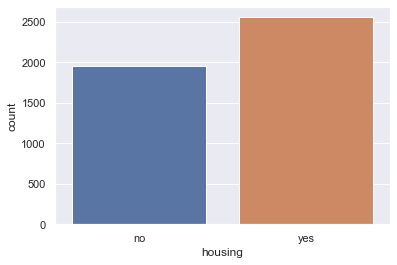

In [13]:
#Displaying the aforementioned information
sns.countplot(x='housing', data=df)

In [14]:
#personal loan
df['loan'].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [15]:
#y : has the client subscribed to a term deposit?
#Thus, y is our target variable.
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

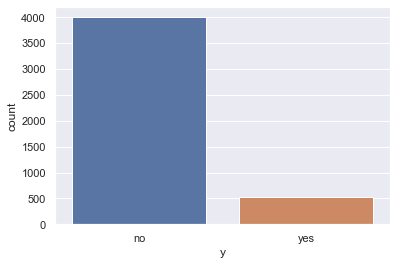

In [16]:
#Insight : 521 customers have subscribed to term deposit 
sns.countplot(x='y', data=df)

In [17]:
df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [18]:
#No. of unique values in job
df['job'].nunique()

12

In [19]:
df['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [20]:
df['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [21]:
df['contact'].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [22]:
#poutcome - outcome of the previous marketing campaign 
df['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [23]:
#To know the numerical variables
numerical_Attributes = (df.select_dtypes(include=['int64']))

In [24]:
#Display numerical attributes
#'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous' are numerical features.
numerical_Attributes.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [25]:
#unique values in age
df['age'].unique()

array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
       26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
       51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
       62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84],
      dtype=int64)

In [26]:
#No. of unique values in age
df['age'].nunique()

67

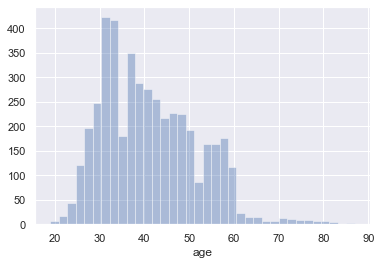

In [27]:
df_drop = df.dropna()
sns.distplot(df_drop.age, kde=False)

In [28]:
#No. of unique values in balance
df['balance'].nunique()

2353

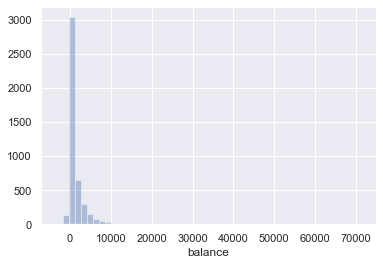

In [29]:
#Insight : No customer has more than 10,000 euros of average yearly balance
sns.distplot(df.balance, kde=False)

In [30]:
#Unique values in day
df['day'].unique()

array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20, 13, 30, 29, 27,  7, 18, 12,
       21, 26, 22,  2,  4, 15,  8, 28,  9,  1, 10, 31, 25, 24],
      dtype=int64)

In [31]:
#No. of unique values in day
df['day'].nunique()

31

In [32]:
#No. of unique values in duration
df['duration'].nunique()

875

In [33]:
#No. of unique values in pdays
df['pdays'].nunique()

292

In [34]:
#Unique values in previous
df['previous'].unique()

array([ 0,  4,  1,  3,  2,  5, 20,  7,  6, 10,  9,  8, 18, 19, 12, 13, 11,
       14, 15, 24, 17, 22, 23, 25], dtype=int64)

In [35]:
#No. of unique values in campaign
df['campaign'].nunique()

32

In [36]:
#A quick statistic summary of the data
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [37]:
#Which columns have greater than 30 unique levels?

In [38]:
test=df.nunique()

In [39]:
#To get the names of the columns we use index
test.index

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [40]:
test[test>30]

age           67
balance     2353
day           31
duration     875
campaign      32
pdays        292
dtype: int64

In [41]:
#What is the most common educational background of the customers, mention % also?

In [42]:
df['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

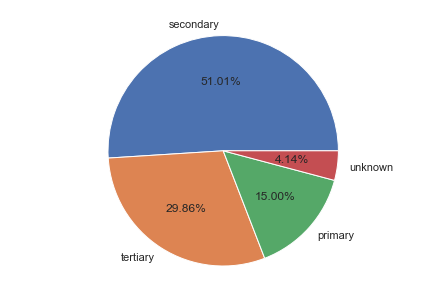

In [43]:
#Answer : Secondary with 51.01%
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
education_level = ['secondary','tertiary','primary','unknown']
customers = [2306,1350,678,187]
ax.pie(customers, labels = education_level ,autopct='%1.2f%%')
plt.show()

In [44]:
#What is the marital status of people who are contacted the most in the campaign?

In [45]:
#Answer : married
df.groupby('marital')[['campaign']].sum()

,campaign
marital,
divorced,1375
married,7964
single,3291


In [46]:
#How many customers belong to tertiary level of education ?

In [47]:
df_t = df['education']=='tertiary'

In [48]:
#1350 customers belong to tertiary level of education
df_t.value_counts()

False    3171
True     1350
Name: education, dtype: int64

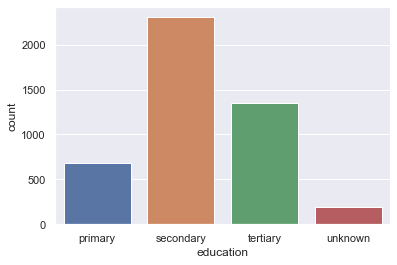

In [49]:
#Displaying the aforementioned information
sns.countplot(x='education', data=df)

In [50]:
#What is the education level of the people having least average yearly balance?

In [51]:
#Answer : unknown
df.groupby('education')[['balance']].sum()

,balance
education,
primary,957027
secondary,2759854
tertiary,2396822
unknown,318133


In [52]:
#What is the job status of the people having maximum average yearly balance?

In [53]:
#Answer : management
df.groupby('job')[['balance']].sum()

,balance
job,
admin.,586380
blue-collar,1026563
entrepreneur,276381
housemaid,233386
management,1712154
retired,533414
self-employed,254811
services,460350
student,129681


In [54]:
#How does number of contacts performed in the previous campaign affect its outcome?

In [55]:
df.groupby('poutcome')[['previous']].sum()

,previous
poutcome,
failure,1397
other,667
success,389
unknown,0


In [56]:
#Which means of contact has the maximum last contact duration ?

In [57]:
#Answer : cellular
df.groupby('contact')[['duration']].sum()

,duration
contact,
cellular,773558
telephone,73250
unknown,346561


In [58]:
#What is the total balance of customers who belong to single status and have house loan ?

In [59]:
#Answer : 195107
df.pivot_table( index='marital', columns= 'housing', aggfunc={'balance': sum})

balance         
housing        no      yes
marital                   
divorced   249643   342979
married   2069478  2023080
single     810813   935843

In [60]:
#previous : number of contacts performed before this campaign and for this client (numeric)

#Customer who has their credit in default belongs & has been contacted the most before this campaign belongs to which education level ?

In [61]:
#Answer : tertiary
df.pivot_table( index='education', columns= 'default', aggfunc={'previous': sum})

previous    
default         no yes
education             
primary        312   0
secondary     1212   7
tertiary       819   8
unknown         95   0

In [62]:
#How many customer having house loan are contacted via telephone ?

In [63]:
df_1 = df[df['housing']=='yes']

In [64]:
df_2 = df_1[df_1['contact']=='telephone']

In [65]:
df_2['contact'].value_counts()

telephone    128
Name: contact, dtype: int64

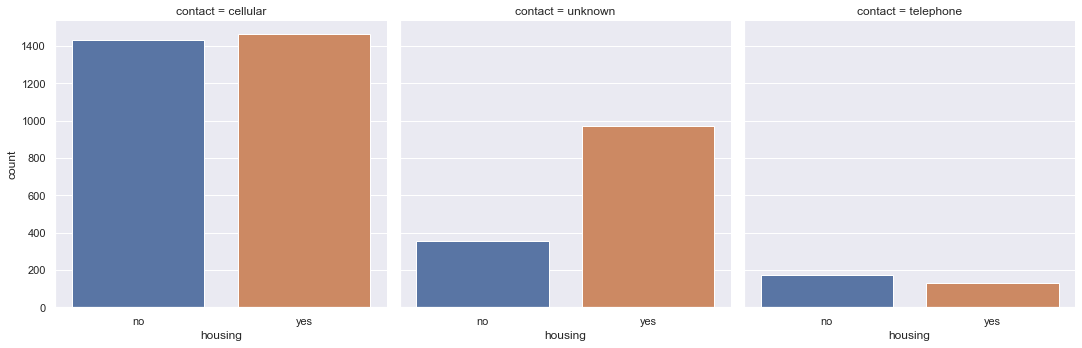

In [66]:
#Insight : Customers having house loan are more likely to be contacted via cellular as compared to telephone and unknown.
sns.catplot(x='housing', col='contact', kind='count', data=df);

In [67]:
#poutcome: outcome of the previous marketing campaign 
#How much successful was the previous marketing campaign for customers belonging to management job ?

In [68]:
df_1 = df[df['job']=='management']

In [69]:
#Answer : Only 23 customers belonging to management job has a reported successful outcome for the previous marketing campaign.
df_1['poutcome'].value_counts()

unknown    783
failure    114
other       49
success     23
Name: poutcome, dtype: int64

In [70]:
#What % of married customers have their credit in default?

In [71]:
df_1 = df[df['marital']=='married']

In [72]:
df_1['marital'].value_counts()

married    2797
Name: marital, dtype: int64

In [73]:
#Answer : 36 married customers have their credit in default. That is, 1.3% of married men have their credit in default.
df_1['default'].value_counts()

no     2761
yes      36
Name: default, dtype: int64

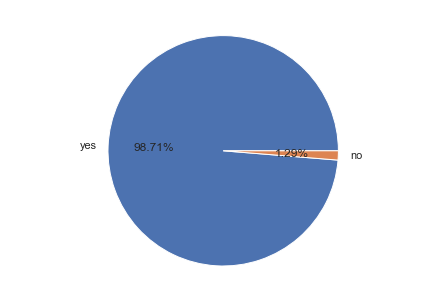

In [74]:
#Displaying aformentioned info
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
credit_in_default = ['yes','no']
Married_customers = [2761,36]
ax.pie(Married_customers, labels = credit_in_default ,autopct='%1.2f%%')
plt.show()

In [75]:
#Is there a particular job which is more prone to have personal loan ?

In [76]:
df_1=df[df['loan']=='yes']

In [77]:
#Answer : Blue-collar job customer is more prone to have personal loan
df_1['job'].value_counts()

blue-collar      156
management       120
technician       119
admin.            91
services          74
entrepreneur      41
retired           32
self-employed     30
housemaid         13
unemployed        13
unknown            1
student            1
Name: job, dtype: int64

In [78]:
#campaign : number of contacts performed during this campaign
#What is the education level and age of the customer who was contacted the most in the campaign?

In [79]:
#Maximum calls done for a customer is 50
df['campaign'].max()

50

In [80]:
#Only one customer was contacted 50 times
df_1 = df[df['campaign']==50]
df_1['campaign'].value_counts()

50    1
Name: campaign, dtype: int64

In [81]:
df_1['education'].value_counts()

secondary    1
Name: education, dtype: int64

In [82]:
#Answer : A 35 year old customer belonging to secondary education level was contacted the most in the campaign.
df_1['age'].value_counts()

35    1
Name: age, dtype: int64

In [83]:
#What is the relationship between last contact duration(duration) & number of contacts performed before this campaign(previous)?

Text(0.5, 1.0, 'Call duration relation with no. of contact before this campaign')

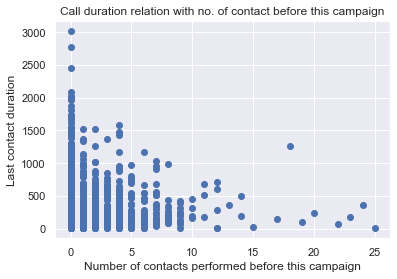

In [84]:
#Answer : Negative correlation
x =[df['previous']]  
y =[df['duration']] 
  
plt.scatter(x,y)
plt.xlabel('Number of contacts performed before this campaign')
plt.ylabel('Last contact duration')
plt.title('Call duration relation with no. of contact before this campaign')

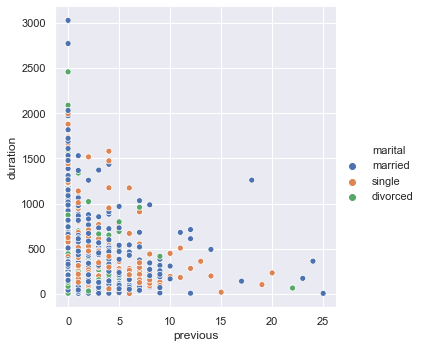

In [85]:
#Above question wrt marital status
#Hue - marital (grouping variable that will produce elements with different colors)
sns.relplot(data=df, x="previous", y="duration", hue="marital")

In [86]:
#Relationship between age and balance?

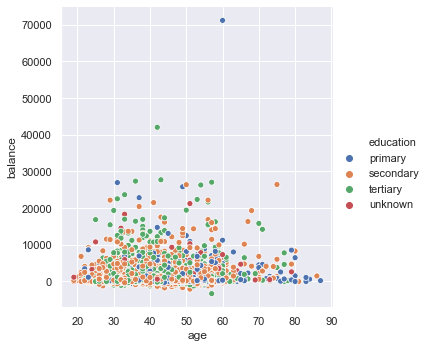

In [87]:
#Insight : A customer in late 50s have 70K+ balance.
sns.relplot(x="age", y="balance", hue = "education", data = df)

In [88]:
#Relationship between age and negative average yearly balance of the customer?

In [89]:
df_1 = df[df['balance']<=0]

Text(0.5, 1.0, 'Age relation negative Balance')

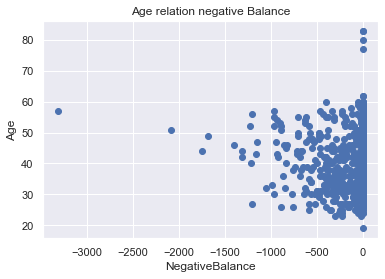

In [90]:
#Insight : A customer in late 50s have a balance below -3000 euros
x =[df_1['balance']]  
y =[df_1['age']] 
  
plt.scatter(x,y)
plt.xlabel('NegativeBalance')
plt.ylabel('Age')
plt.title('Age relation negative Balance')

In [91]:
#All the informations of the customer who owns the maximum average yearly balance in euros ?

In [92]:
df_max = df['balance'].max()

In [93]:
df_1 = df[df['balance']==df_max]

In [94]:
df_1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3700,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no


In [95]:
#Is there any particular education level not likely to subscribe the term deposit ?

In [96]:
df_1=df[df['y']=='no']

In [97]:
df_1['education'].value_counts()

secondary    2061
tertiary     1157
primary       614
unknown       168
Name: education, dtype: int64

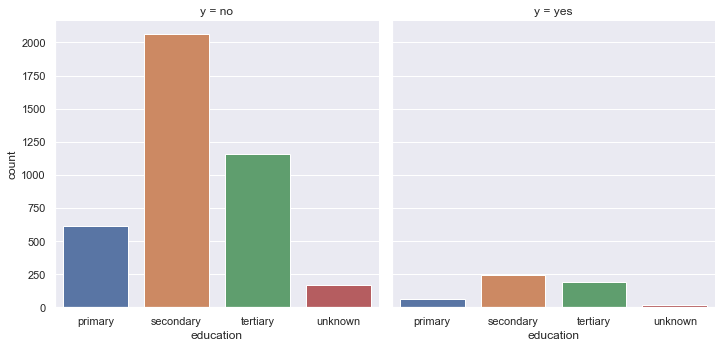

In [98]:
#Answer : Secondary
sns.catplot(x='education', col='y', kind='count', data=df);